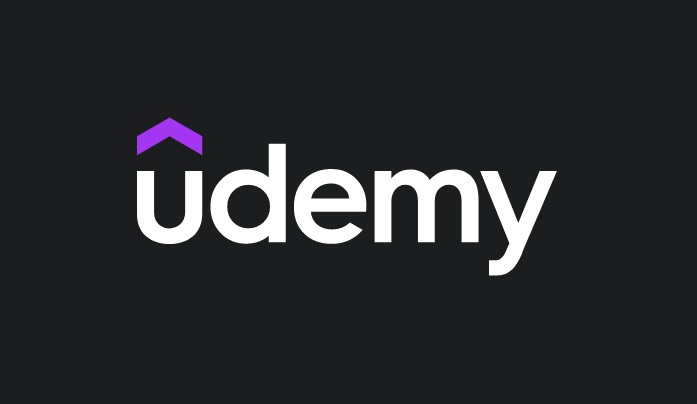

# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  

# Data Cleaning and Filter


In [2]:
df = pd.read_csv("udemy_courses.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
df.shape

(3678, 12)

In [4]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [6]:
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [7]:
df.duplicated().sum()

6

In [8]:
df[df.duplicated() == True]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [9]:
data= []
for i in df["published_timestamp"]:
    i = i[:10]
    data.append(i)

In [10]:
df["published_timestamp"] = data

In [11]:
df.rename(columns={"published_timestamp":"published_date"}, inplace= True)

In [12]:
df.query("is_paid == False").head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject
95,1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,0,1514,66,11,Beginner Level,0.55,2017-03-23,Business Finance
103,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,0,50855,2698,15,Beginner Level,1.50,2013-12-25,Business Finance
106,265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,0,17160,620,23,All Levels,1.00,2014-08-29,Business Finance
108,923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,0,6811,151,51,All Levels,2.00,2016-08-05,Business Finance
112,191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,0,19339,794,9,Beginner Level,2.00,2014-03-31,Business Finance


In [13]:
df.level.unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [14]:
df[["All Levels", "Beginner Level", "Expert Level", "Intermediate Level"]] = pd.get_dummies(df.level)
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_date,subject,All Levels,Beginner Level,Expert Level,Intermediate Level
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18,Business Finance,1,0,0,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09,Business Finance,1,0,0,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19,Business Finance,0,0,0,1
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30,Business Finance,1,0,0,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13,Business Finance,0,0,0,1


In [15]:
df.drop(columns=["course_id", "url", "is_paid", "level", "All Levels"], inplace= True)

In [16]:
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017-01-18,Business Finance,0,0,0
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,39.0,2017-03-09,Business Finance,0,0,0
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,2.5,2016-12-19,Business Finance,0,0,1
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,3.0,2017-05-30,Business Finance,0,0,0
4,How To Maximize Your Profits Trading Options,200,1276,45,26,2.0,2016-12-13,Business Finance,0,0,1


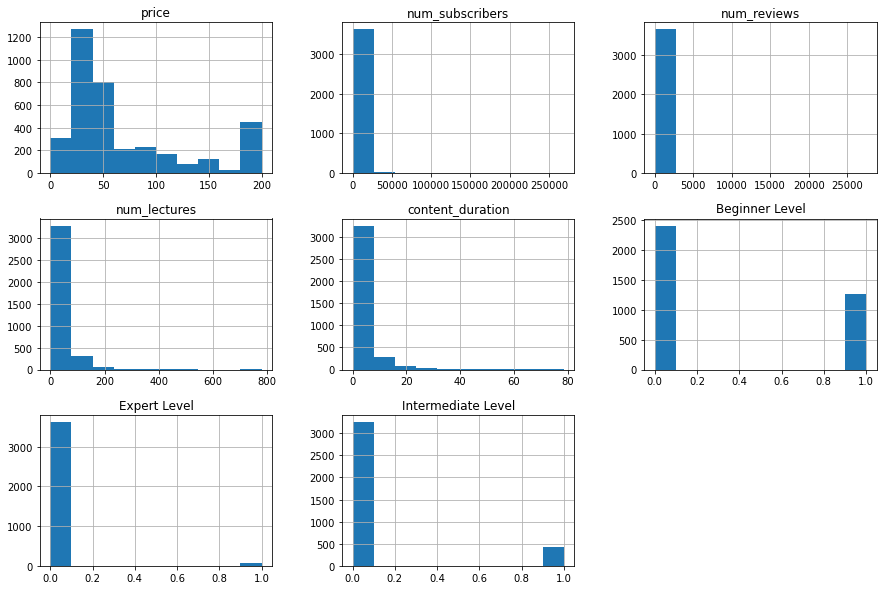

In [17]:
df.hist(figsize=(15, 10));

In [18]:
# export new dataset after fixing it
# df.to_csv("new_Data.csv")

In [19]:
df.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration,Beginner Level,Expert Level,Intermediate Level
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517,0.345296,0.015769,0.114464
std,61.005755,9504.117010,935.452044,50.383346,6.053840,0.475529,0.124599,0.318418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000,0.000000,0.000000,0.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000,1.000000,0.000000,0.000000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000,1.000000,1.000000,1.000000


# Explore and Visualize Data 

In [20]:
df.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017-01-18,Business Finance,0,0,0
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,39.0,2017-03-09,Business Finance,0,0,0
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,2.5,2016-12-19,Business Finance,0,0,1
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,3.0,2017-05-30,Business Finance,0,0,0
4,How To Maximize Your Profits Trading Options,200,1276,45,26,2.0,2016-12-13,Business Finance,0,0,1


# Q1: Correlation Between columns


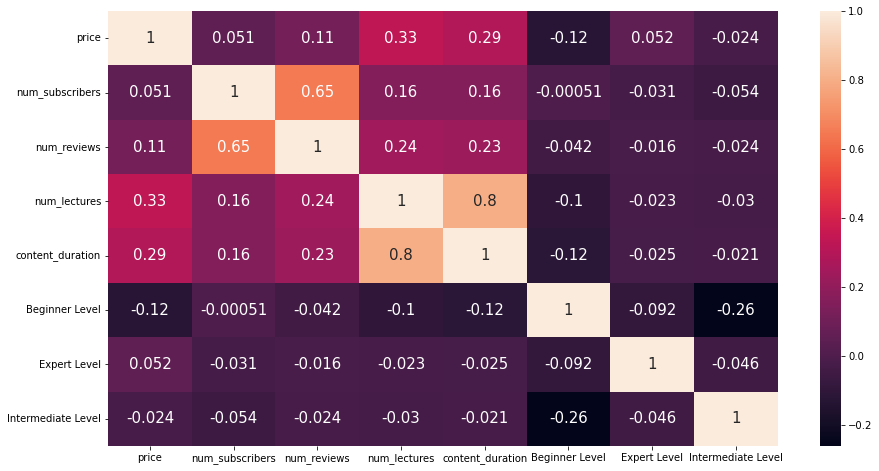

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, annot_kws={"size":15});

In [22]:
Free_courses = df.query("price == 0")
Free_courses.shape

(310, 11)

In [23]:
paid_courses = df.query("price != 0")
paid_courses.shape

(3368, 11)



# Q2: Relation Between Free and paid Subscribe and Reviews

Text(0.5, 1.0, 'Relation Between Free Subscribe and Reviews')

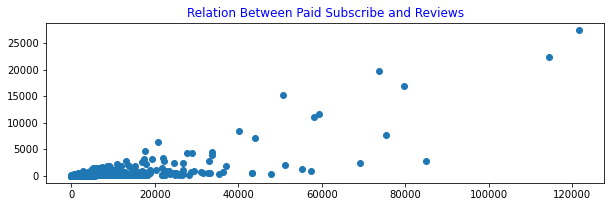

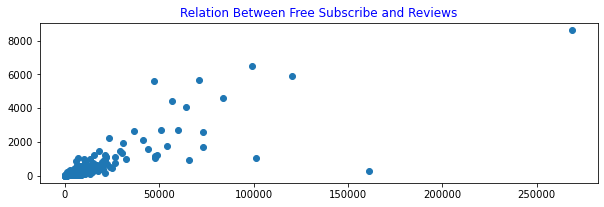

In [24]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.scatter(x= paid_courses["num_subscribers"], y= paid_courses["num_reviews"])
plt.title("Relation Between Paid Subscribe and Reviews", color= "b")


plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.scatter(x= Free_courses["num_subscribers"], y= Free_courses["num_reviews"])
plt.title("Relation Between Free Subscribe and Reviews", color= "b")


# Q3: Relation Between Paid and free Lectures and Duration

Text(0.5, 1.0, 'Relation Between Free Lectures and Duration')

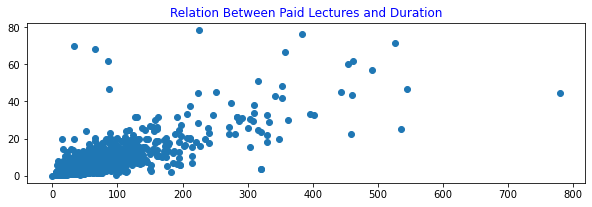

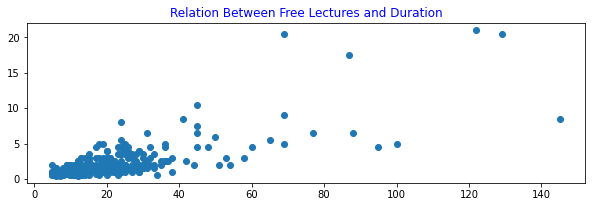

In [25]:
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.scatter(x= paid_courses["num_lectures"], y= paid_courses["content_duration"])
plt.title("Relation Between Paid Lectures and Duration", color= "b")


plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 2)
plt.scatter(x= Free_courses["num_lectures"], y= Free_courses["content_duration"])
plt.title("Relation Between Free Lectures and Duration", color= "b")

# Q4: Top 10 Courses Prices from every Subject?

In [26]:
paid_courses.head()

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017-01-18,Business Finance,0,0,0
1,Complete GST Course & Certification - Grow You...,75,2792,923,274,39.0,2017-03-09,Business Finance,0,0,0
2,Financial Modeling for Business Analysts and C...,45,2174,74,51,2.5,2016-12-19,Business Finance,0,0,1
3,Beginner to Pro - Financial Analysis in Excel ...,95,2451,11,36,3.0,2017-05-30,Business Finance,0,0,0
4,How To Maximize Your Profits Trading Options,200,1276,45,26,2.0,2016-12-13,Business Finance,0,0,1


In [27]:
paid_courses.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

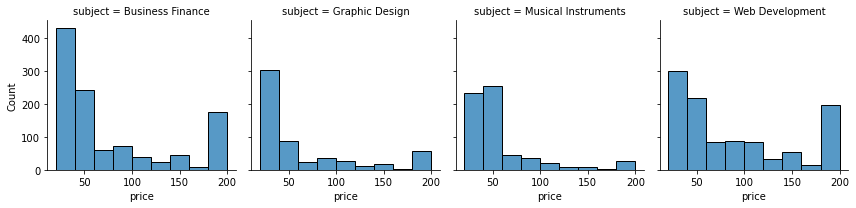

In [28]:
g = sns.FacetGrid(data=paid_courses, col='subject')
g.map(sns.histplot, 'price', 
      binwidth=20,
      binrange=(paid_courses.price.min(), paid_courses.price.max()));

# Q5: Requests Level?

In [29]:
paid_courses.head(1)

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017-01-18,Business Finance,0,0,0


In [30]:
B = paid_courses[paid_courses["Beginner Level"] == 1 ]["Beginner Level"].count()
E = paid_courses[paid_courses["Expert Level"] == 1 ]["Expert Level"].count()
I = paid_courses[paid_courses["Intermediate Level"] == 1 ]["Intermediate Level"].count()
list_Level = [B, E, I]

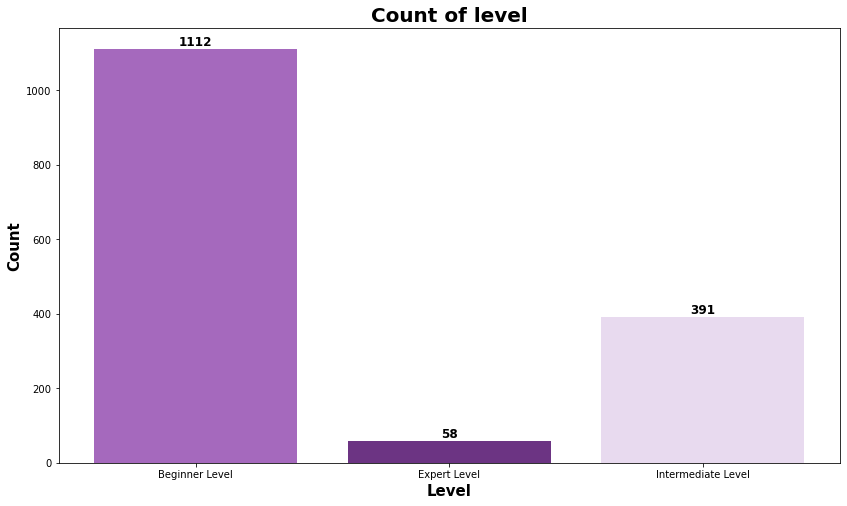

In [31]:
plt.figure(figsize=(14, 8))

plt.bar(x="Beginner Level", height=B, color= "#A569BD")
plt.bar(x="Expert Level", height=E, color= "#6C3483")
plt.bar(x="Intermediate Level", height=I, color= "#E8DAEF")

plt.title("Count of level", weight= "bold", fontsize=20)
plt.xlabel("Level", weight= "bold", fontsize=15)
plt.ylabel("Count", weight= "bold", fontsize=15)

for i in range(len(list_Level)):
    plt.text(i, list_Level[i], list_Level[i],
            ha = "center", 
            va = "bottom", 
            fontsize= 12,
            weight= "bold")
    

plt.show()

# Q6: The most popular subject for every column --> (paided)

In [32]:
def popu(xvar, yvar, title, group, figesize= (14, 7)):
        
    
    print(group)
    
    if figesize:
        plt.figure(figsize=(14, 7))

    plt.bar(x=xvar, height=yvar, color= "#A569BD")

    plt.title(f"Number of {title} in every subject", weight= "bold", fontsize=20)
    plt.xlabel("subject", weight= "bold", fontsize=15)
    plt.ylabel(f"sum of {title}", weight= "bold", fontsize=15)

    for i in range(len(xvar)):
        plt.text(i, yvar[i], yvar[i],
                ha = "center", 
                va = "bottom", 
                fontsize= 12,
                weight= "bold")


    plt.show()

In [34]:
group_s = paid_courses.groupby("subject").num_subscribers.sum()
values_s = group_s.values
index_s = group_s.index

subject
Business Finance       1265483
Graphic Design          778327
Musical Instruments     541954
Web Development        5597831
Name: num_subscribers, dtype: int64


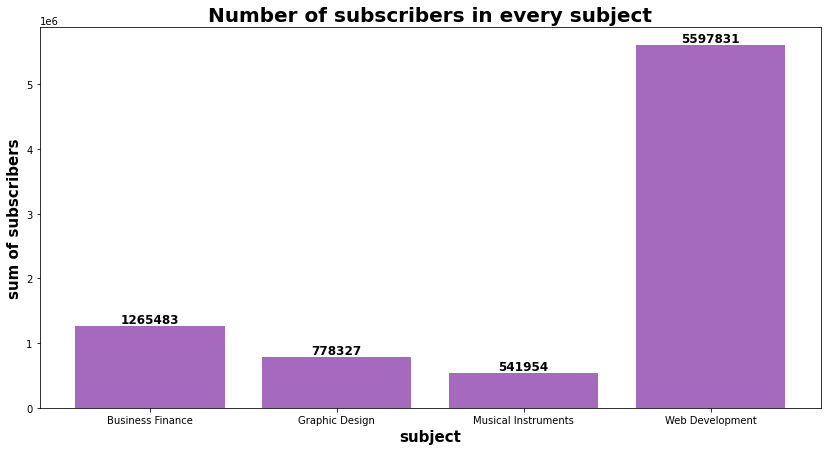

In [35]:
popu(index_s, values_s, "subscribers", group_s)

In [36]:
group_r = paid_courses.groupby("subject").num_reviews.sum()
values_r = group_r.values
index_r = group_r.index

subject
Business Finance        51772
Graphic Design          26494
Musical Instruments     24895
Web Development        339522
Name: num_reviews, dtype: int64


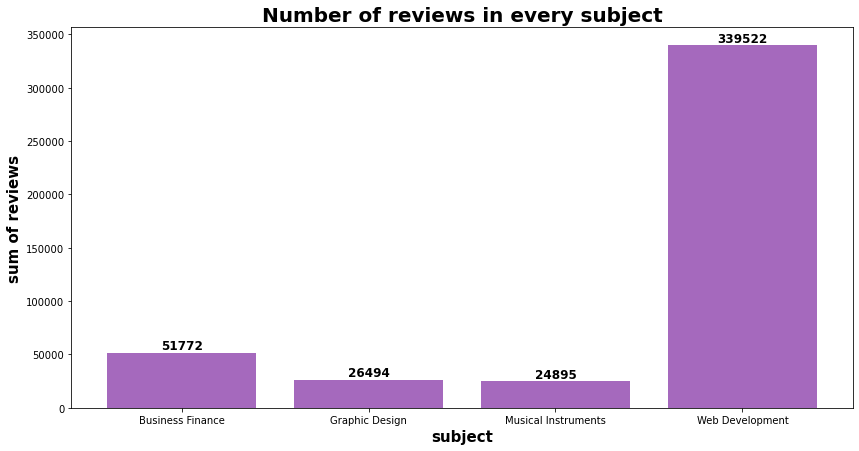

In [37]:
popu(index_r, values_r, "reviews", group_r)

In [38]:
group_l = paid_courses.groupby("subject").num_lectures.sum()
values_l = group_l.values
index_l = group_l.index

subject
Business Finance       36946
Graphic Design         18630
Musical Instruments    25120
Web Development        60185
Name: num_lectures, dtype: int64


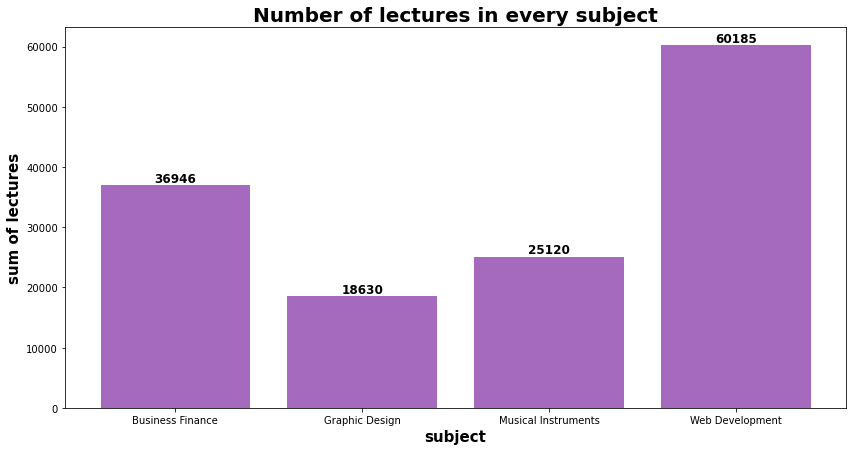

In [39]:
popu(index_l, values_l, "lectures", group_l)

In [40]:
group_d = paid_courses.groupby("subject").content_duration.sum()
values_d = group_d.values
index_d = group_d.index

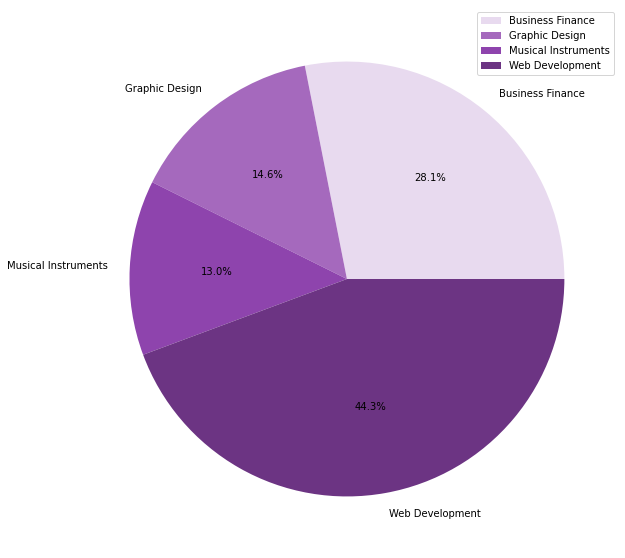

In [41]:
plt.figure(figsize=(10 , 10));

colors = "#E8DAEF", "#A569BD", "#8E44AD", "#6C3483"
plt.pie(values_d , labels= index_d , autopct= "%1.1f%%", colors=colors )
plt.legend(labels= index_d)
plt.show()

# Q7: How to change every subject over the years?


In [42]:
df.head(1)

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017-01-18,Business Finance,0,0,0


In [43]:
# convert date column form object to date
df["published_date"] = pd.to_datetime(df.published_date).dt.year
df.head(1)

,course_title,price,num_subscribers,num_reviews,num_lectures,content_duration,published_date,subject,Beginner Level,Expert Level,Intermediate Level
0,Ultimate Investment Banking Course,200,2147,23,51,1.5,2017,Business Finance,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_title        3678 non-null   object 
 1   price               3678 non-null   int64  
 2   num_subscribers     3678 non-null   int64  
 3   num_reviews         3678 non-null   int64  
 4   num_lectures        3678 non-null   int64  
 5   content_duration    3678 non-null   float64
 6   published_date      3678 non-null   int64  
 7   subject             3678 non-null   object 
 8   Beginner Level      3678 non-null   uint8  
 9   Expert Level        3678 non-null   uint8  
 10  Intermediate Level  3678 non-null   uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 240.8+ KB


In [45]:
df.subject.unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [46]:
df_B = df.query("subject == 'Business Finance'")

group_B = df_B.groupby("published_date").subject.count()
index = group_B.index
value = group_B.values


In [47]:
fig = px.line(group_B, x= index, y= value, title="Business Finance") 
fig.show()

In [48]:
df_S = df.query("subject == 'Graphic Design'")

group_S = df_S.groupby("published_date").subject.count()
index = group_S.index
value = group_S.values

fig = px.line(group_S, x= index, y= value, title="Graphic Design") 
fig.show()

In [49]:
df_P = df.query("subject == 'Musical Instruments'")

group_P = df_P.groupby("published_date").subject.count()
index = group_P.index
value = group_P.values

fig = px.line(group_P, x= index, y= value, title="Musical Instruments") 
fig.show()

In [50]:
df_W = df.query("subject == 'Web Development'")

group_W = df_W.groupby("published_date").subject.count()
index = group_W.index
value = group_W.values

fig = px.line(group_W, x= index, y= value, title="Web Development") 
fig.show()